<a href="https://colab.research.google.com/github/SHWETASHUKLA2502/GRIP_TSF/blob/main/T3_SHWETA_SHUKLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3: To Explore Decision Tree Algorithm
- For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

### Installing and Importing Libraries


In [ ]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import sklearn.datasets as datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from google.colab import files

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#uploading dataset
files.upload()

Saving Iris.csv to Iris.csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

### Importing & Exploring dataset

In [ ]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.drop(['Id'],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Visualizing Dataset

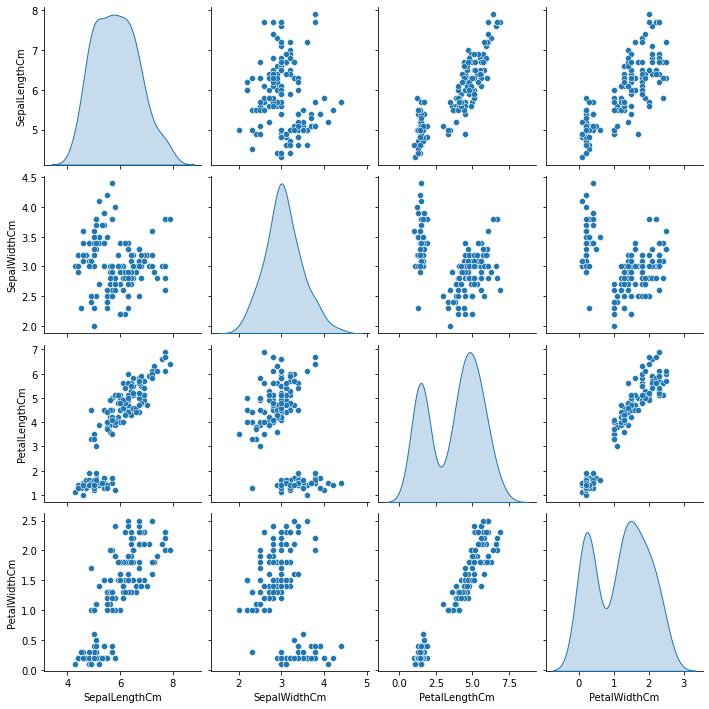

In [ ]:
sns.pairplot(data,diag_kind='kde')

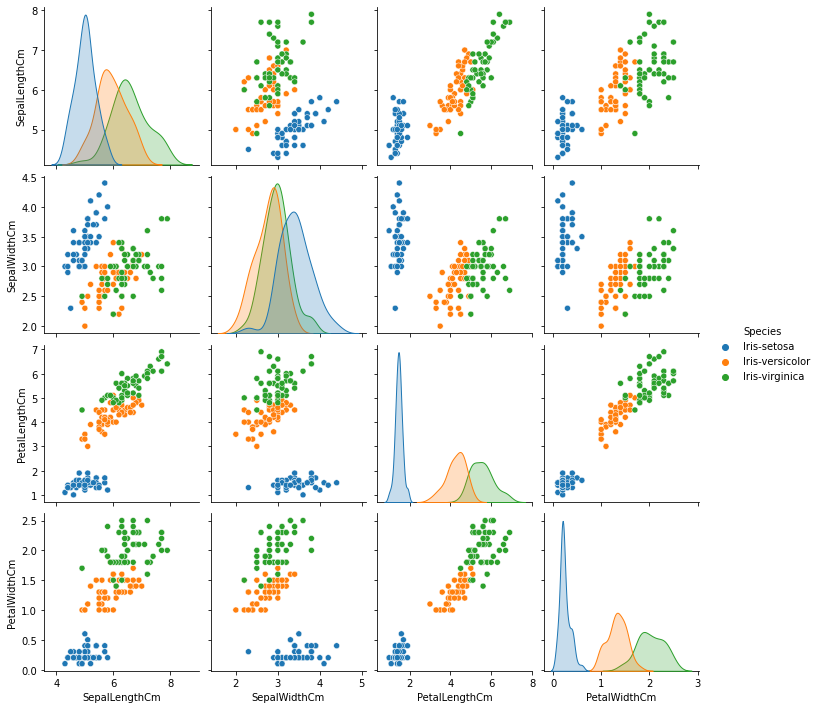

In [ ]:
sns.pairplot(data,hue="Species")

### Decision Tree classifier & its Visualization

In [ ]:
iris=datasets.load_iris()
tar=iris.target
tar

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
data.drop(["Species"],axis=1,inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(data,tar)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

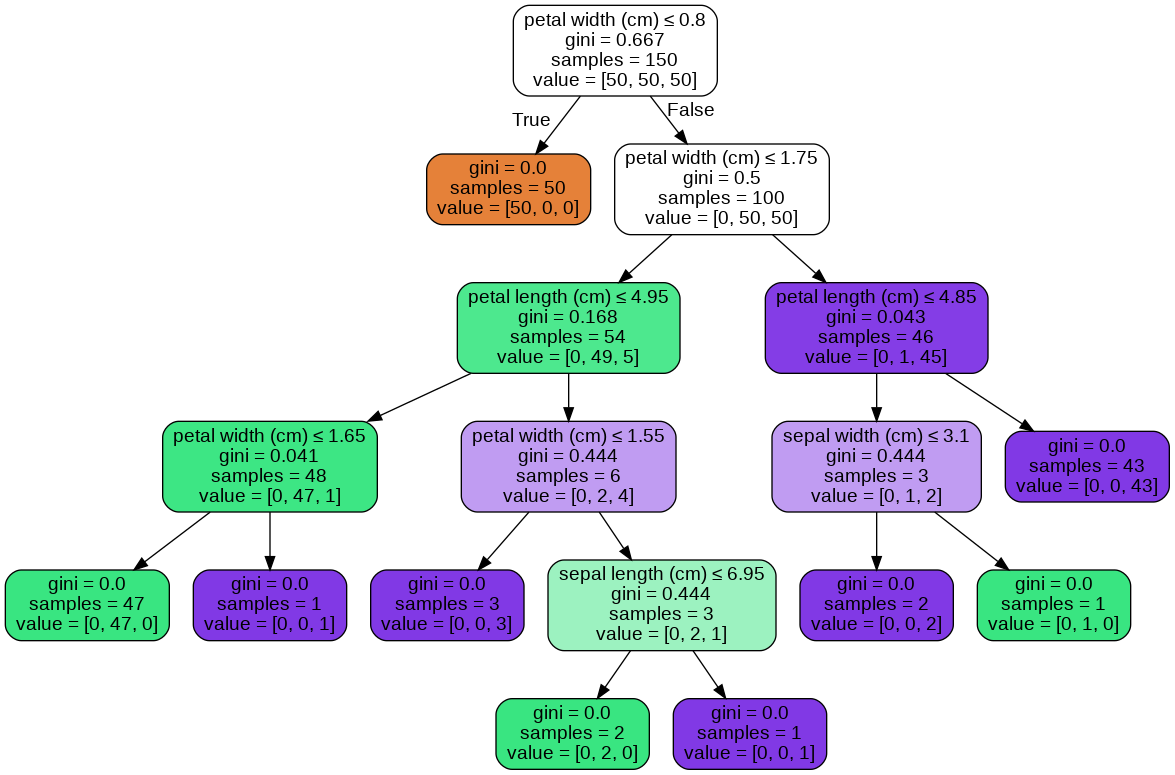

In [ ]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())